In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------------------------------------------------------------------------------------------------
# parameter definitions
# ---------------------------------------------------------------------------------------------------------------------

# preliminaries
data_files = 0
save_fig = 0

# channel SNRs
SNR1dB = 20
SNR2dB = 0   # must be smaller than SNR1dB
SNR1 = 10.0**(SNR1dB/10.0)
SNR2 = 10.0**(SNR2dB/10.0)

# power split parameter
ell = np.arange(0.001, 0.999, 0.001)

# time / bandwidth split parameter
tau_TD = np.array([0.001, 0.2, 0.4, 0.6, 0.8, 0.999])
tau_FD = np.arange(0.2, 0.8, 0.2)

Tau, Ell = np.meshgrid(tau_FD, ell)

# ---------------------------------------------------------------------------------------------------------------------
# calculating results
# ---------------------------------------------------------------------------------------------------------------------

# channel capacities for individual channels
C1 = np.log2(1+SNR1)
C2 = np.log2(1+SNR2)

# capacities for TDMA (time sharing)
Corth1_TD = tau_TD * np.log2(1+SNR1)
Corth2_TD = (1-tau_TD) * np.log2(1+SNR2)

# capacities for FDMA (frequency sharing)
Corth1_FD = Tau  * np.log2( 1 + Ell*SNR1/Tau )
Corth2_FD = (1-Tau) * np.log2( 1 + (1-Ell)*SNR2/(1-Tau) )

# maximum sum rate for FDMA
# optimal power split ell for given frequency split tau (analytic solution)
ell_opt = (1.0/SNR2 - 1.0/SNR1) * tau_FD * (1-tau_FD) + tau_FD
# resulting optimal SNRs
gamma1_opt = SNR1 + (SNR1/SNR2 - 1.0) * (1-tau_FD)
gamma2_opt = SNR2 + (SNR2/SNR1 - 1.0) * tau_FD
# sum rates for optimized FDMA
sumRateFD1_opt = tau_FD * np.log2(1 + gamma1_opt)
sumRateFD2_opt = (1-tau_FD) * np.log2(1 + gamma2_opt)

# NOMA
sumRateNOMA1 = np.log2(1+ell*SNR1)
sumRateNOMA2 = np.log2(1+(1-ell)*SNR2/(1+ell*SNR2))


In [2]:
# power split parameters generate 3D simplex

Rc = np.zeros((100,100))
R1 = np.zeros((100,100))
R1sic = np.zeros((100,100))
R2 = np.zeros((100,100))
Rsum = np.zeros((100,100))
Rsumsic = np.zeros((100,100))

# power for common message
ellc = np.arange(0.0, 1.0, 0.01)
for runc in range(100):
    ell1_max = 1 - ellc[runc]
    ell1 = np.linspace(0.01,ell1_max,100)
    Rc[runc,:] = np.log2(1+np.divide(SNR2*ellc[runc],1+SNR1*ell1+SNR2*(1-ellc[runc]-ell1)))
    R1[runc,:] = np.log2(1+np.divide(SNR1*ell1,(1+SNR1*(1-ellc[runc]-ell1))))
    R1sic[runc,:] = np.log2(1+SNR1*ell1)
    R2[runc,:] = np.log2(1+np.divide(SNR2*(1-ellc[runc]-ell1),1+SNR2*ell1))

    
sumRateRS = R1 + R2 + Rc
sumRateRSsic = R1sic + R2 + Rc

ind = np.unravel_index(np.argmax(sumRateRS, axis=None), sumRateRS.shape)
indsic = np.unravel_index(np.argmax(sumRateRSsic, axis=None), sumRateRSsic.shape)

In [71]:
Rc[90,:]

array([0.51664254, 0.49860222, 0.48179054, 0.4660851 , 0.45137935,
       0.43758007, 0.42460538, 0.41238305, 0.40084906, 0.38994652,
       0.37962467, 0.36983808, 0.36054595, 0.35171156, 0.34330175,
       0.33528648, 0.32763852, 0.32033308, 0.31334756, 0.30666134,
       0.3002555 , 0.29411272, 0.28821706, 0.28255386, 0.27710959,
       0.27187177, 0.26682883, 0.26197008, 0.25728557, 0.25276607,
       0.248403  , 0.24418834, 0.24011465, 0.23617495, 0.23236271,
       0.22867184, 0.22509663, 0.22163171, 0.21827204, 0.21501289,
       0.21184981, 0.20877861, 0.20579533, 0.20289625, 0.20007784,
       0.19733677, 0.19466991, 0.19207428, 0.18954705, 0.18708555,
       0.18468725, 0.18234975, 0.18007074, 0.17784808, 0.17567968,
       0.17356358, 0.17149791, 0.16948089, 0.16751082, 0.16558607,
       0.16370509, 0.16186642, 0.16006863, 0.15831037, 0.15659036,
       0.15490736, 0.15326019, 0.15164771, 0.15006883, 0.14852252,
       0.14700779, 0.14552366, 0.14406922, 0.14264359, 0.14124

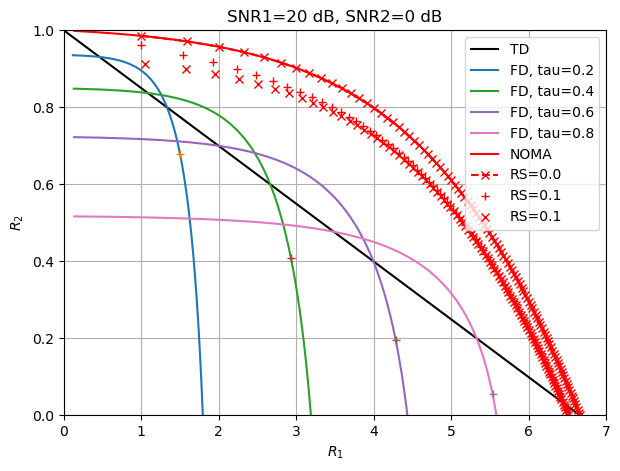

In [3]:
ptr = 10

fig_BC = plt.figure(figsize=(7,5))
ax = fig_BC.add_subplot(111)
ax.plot(Corth1_TD,Corth2_TD,'k-',label='TD')
for run in range(0, tau_FD.size):
    ax.plot(Corth1_FD[:,run], Corth2_FD[:,run], label='FD, tau=%.1f' %(tau_FD[run]))
    ax.plot(sumRateFD1_opt[run], sumRateFD2_opt[run], '+')
ax.plot(sumRateNOMA1, sumRateNOMA2, 'r-',label='NOMA')
ax.plot(R1sic[indsic[0],:], R2[indsic[0],:], 'r--x',label='RS=%.1f' %(ellc[indsic[0]]))
ax.plot(R1sic[ptr,:],R2[ptr,:]+Rc[ptr,:], 'r+',label='RS=%.1f' %(ellc[ptr]))
ax.plot(R1sic[ptr,:]+Rc[ptr,:], R2[ptr,:], 'rx',label='RS=%.1f' %(ellc[ptr]))
plt.grid(True)
plt.legend()
plt.xlim(0, 7)
plt.ylim(0, 1)
plt.xlabel('$R_1$')
plt.ylabel('$R_2$')
plt.title('SNR1=%d dB, SNR2=%d dB' %(SNR1dB, SNR2dB))

if data_files:
    name = '../Results/part3_cr_bc_' + str(SNR1dB) + '_' + str(SNR2dB)
    np.savetxt(name + '_TD.rst', list(zip(Corth1_TD, Corth2_TD)), delimiter='\t')
    np.savetxt(name + '_FD.rst', list(zip(Corth1_FD[:,0], Corth2_FD[:,0], Corth1_FD[:,1], Corth2_FD[:,1], Corth1_FD[:,2], Corth2_FD[:,2], Corth1_FD[:,3], Corth2_FD[:,3])), delimiter='\t')
    np.savetxt(name + '_FDsr.rst', list(zip(sumRateFD1_opt, sumRateFD2_opt)), delimiter='\t')
    name = '../Results/part3_bc_' + str(SNR1dB) + '_' + str(SNR2dB)
    np.savetxt(name + '_FD_ellopt.rst', list(zip(tau_FD, ell_opt)), delimiter='\t')
if save_fig:
    name = '../Figures/part3_cr_bc_td_fd_' + str(SNR1dB) + '_' + str(SNR2dB) + '.pdf'
    fig_BC.savefig(name, bbox_inches='tight', dpi=300, format='pdf')

plt.show()







Text(0.5,1,'SNR1=20 dB, SNR2=0 dB')

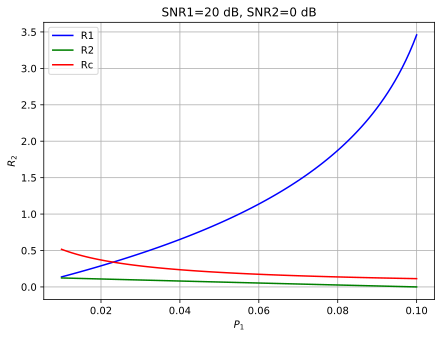

In [80]:
ptr = 90
ell1_max = 1 - ellc[ptr]
ell1 = np.linspace(0.01,ell1_max,100)

fig_RS = plt.figure(figsize=(7,5))
ax = fig_RS.add_subplot(111)
ax.plot(ell1,R1[ptr,:],'b-',label='R1')
ax.plot(ell1,R2[ptr,:],'g-',label='R2')
ax.plot(ell1,Rc[ptr,:],'r-',label='Rc')
plt.grid(True)
plt.legend()
#plt.xlim(0, 7)
#plt.ylim(0, 1)
plt.xlabel('$P_1$')
plt.ylabel('$R_2$')
plt.title('SNR1=%d dB, SNR2=%d dB' %(SNR1dB, SNR2dB))

